In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
plt.style.use('ggplot')
plt.rcParams['grid.linestyle'] = '-.'
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 12
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['patch.facecolor'] = 'white';

In [148]:
df = pd.read_csv("machine_0.csv", header=0, names=("time", "metric1", "metric2", "metric3", "metric4"))

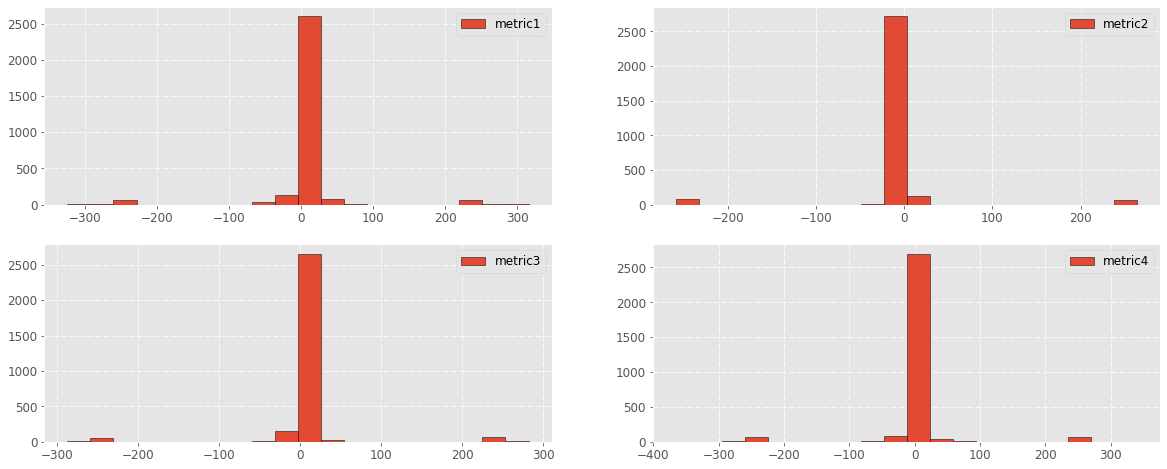

In [149]:
#df.metric1.plot(kind="hist", bins=20, ec="black")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 8))
df["metric1"].hist(bins=20, ax=ax1, ec="black", label="metric1")
df["metric2"].hist(bins=20, ax=ax2, ec="black", label="metric2")
df["metric3"].hist(bins=20, ax=ax3, ec="black", label="metric3")
df["metric4"].hist(bins=20, ax=ax4, ec="black", label="metric4")
list(map(lambda x: x.legend(),[ax1,ax2,ax3,ax4]));

In [150]:
df["time"] = pd.to_datetime(df.time).dt.floor("s")

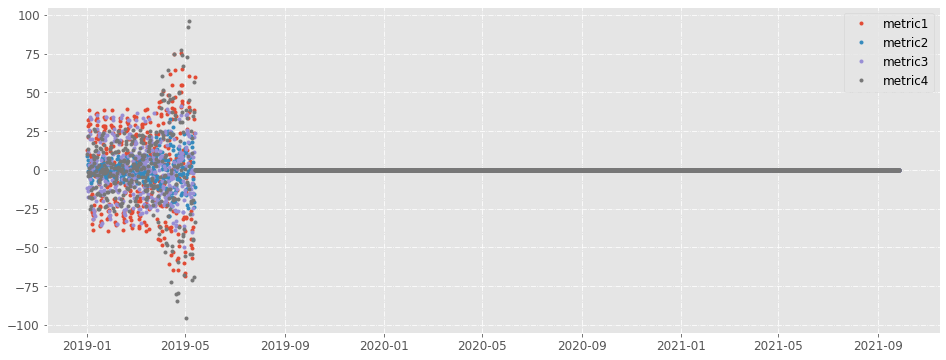

In [151]:
def df_filter(col,cutoff, cutoff2=None):
    if cutoff2 is None:
        return df[df[col] < cutoff]
    else:
        return df[(df[col] > cutoff) & (df[col] < cutoff2)]

def plot(col, cutoff=400, cutoff2=None):
    fig = plt.figure(figsize=(16,6))
    ax = fig.add_subplot(111)
    metrics = ("metric1", "metric2", "metric3", "metric4")
    # metrics = ("metric4",)
    if col == "metrics":
        for metric in metrics: 
            filtered = df_filter(metric, cutoff, cutoff2)
            ax.plot(filtered["time"],  filtered[metric], '.', label=metric)
        ax.legend()
    elif col == "time":
        filtered = df_filter("time", cutoff, cutoff2)
        for metric in metrics: 
            ax.plot(filtered["time"],  filtered[metric], '.', label=metric)
        ax.legend()
plot("metrics", -100, 100)

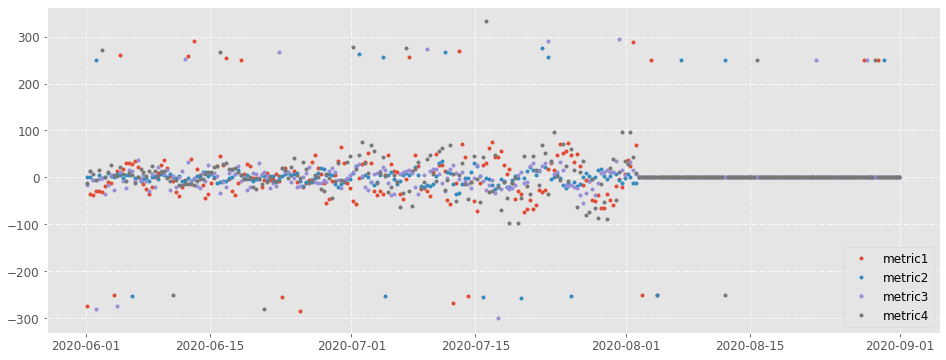

In [138]:
plot("time", datetime.strptime('2020/06/01', "%Y/%m/%d"), datetime.strptime('2020/09/01', "%Y/%m/%d"))

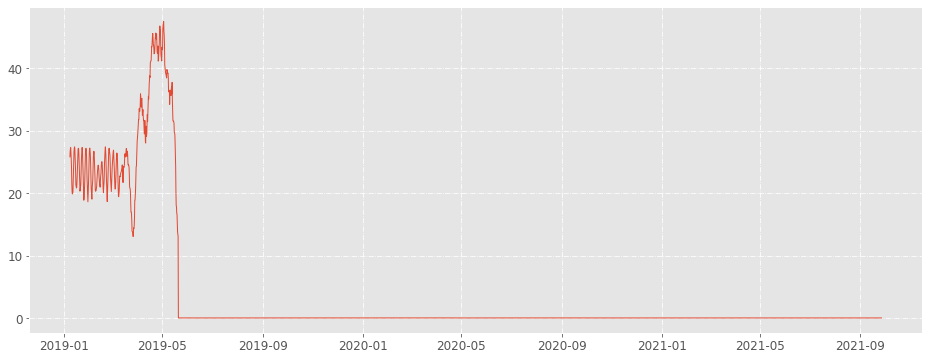

In [152]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
filtered = df_filter("metric1", -100, 100)
ax.plot(filtered["time"], filtered["metric1"].rolling(window=21).std())

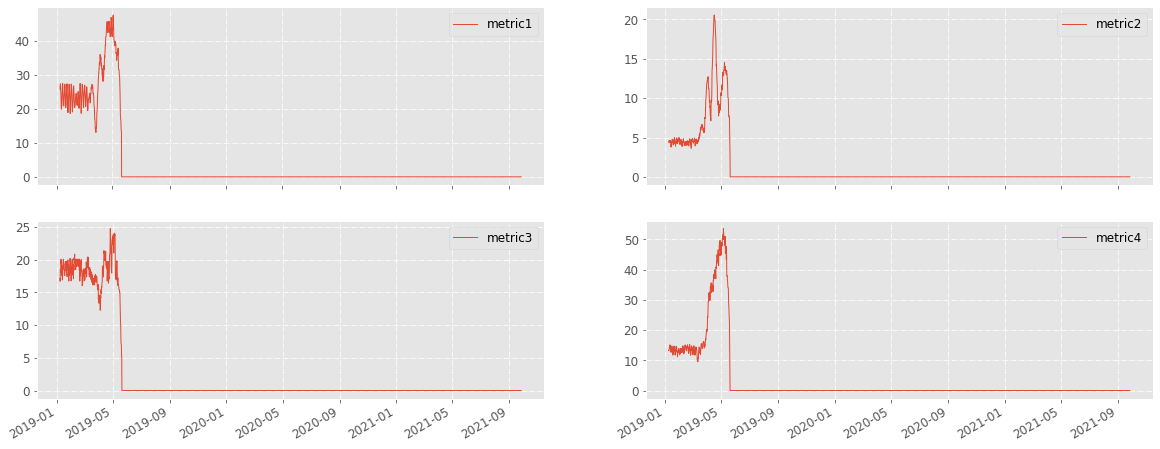

In [153]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 8))

filtered = df_filter("metric1", -100, 100)
ax1.plot(filtered["time"], filtered["metric1"].rolling(window=21).std(), label="metric1")
ax1.legend()

filtered = df_filter("metric2", -100, 100)
ax2.plot(filtered["time"], filtered["metric2"].rolling(window=21).std(), label="metric2")
ax2.legend()

filtered = df_filter("metric3", -100, 100)
ax3.plot(filtered["time"], filtered["metric3"].rolling(window=21).std(), label="metric3")
ax3.legend()

filtered = df_filter("metric4", -100, 100)
ax4.plot(filtered["time"], filtered["metric4"].rolling(window=21).std(), label="metric4")
ax4.legend()
fig.autofmt_xdate()

